## The Sparks Foundation

## Task - Prediction using Decision Tree Classifier

### Submitted By - Muskan Mittal

In [26]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#load the dataset
iris = datasets.load_iris()

#creating the dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)


In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y=iris.target

In [30]:
df['target']=y

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Univariate analysis of continuous variables

In [32]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

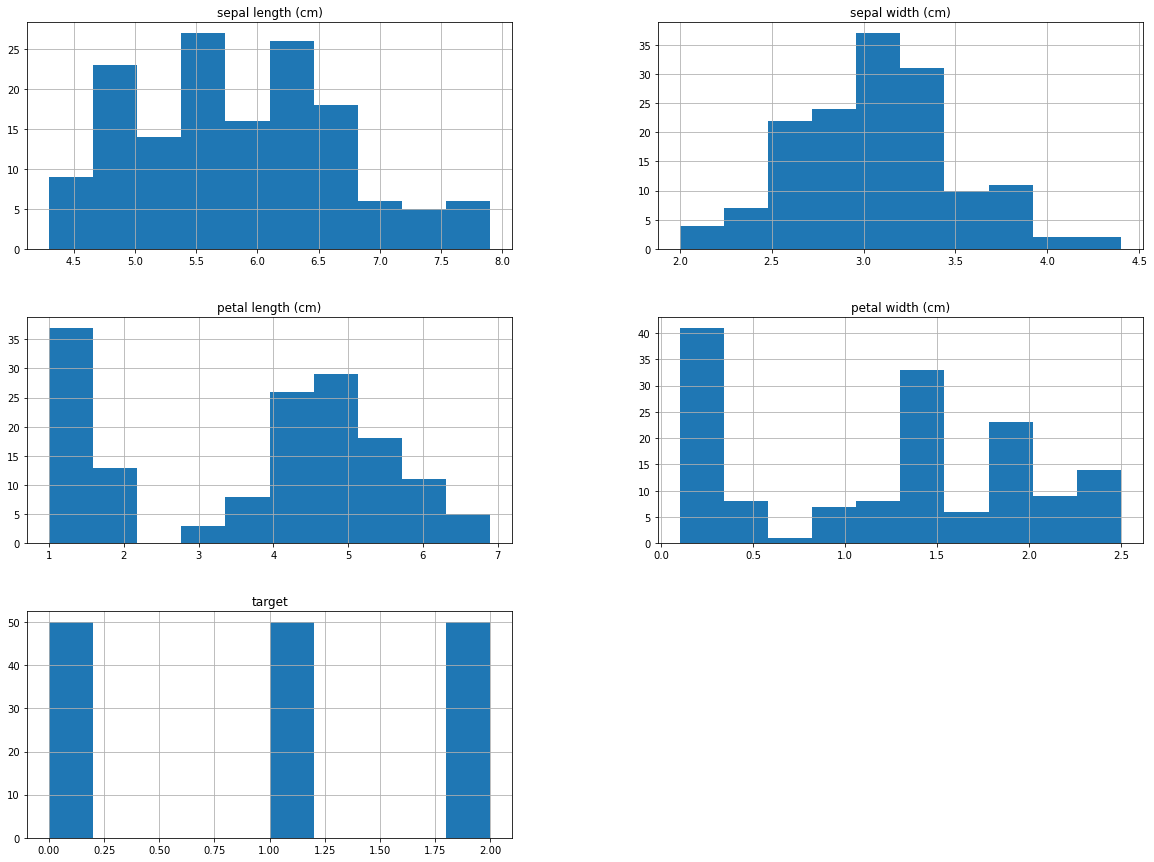

In [33]:
df.hist(figsize = (20,15))

In [34]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Check if there is missing values in dataset

In [35]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Decision Tree Classifier Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [37]:
x = df.drop('target', axis=1)
y = df['target']

### Splitting dataset into training and testing sets 

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
# fit the classifier with default hyperparameters
dtree = DecisionTreeClassifier(random_state = 1234)
model = dtree.fit(x_train, y_train)

In [40]:
pred = dtree.predict(x_test)

In [41]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
comparison.head()

,Actual,Predicted
90,1,1
36,0,0
34,0,0
32,0,0
97,1,1


### Accuracy of Model

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy of Decision Tree Classifier: ',accuracy_score(y_test, pred))

Accuracy of Decision Tree Classifier:  1.0


#### Classification Report and Confusion Matrix

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Classification Report: \n',classification_report(y_test, pred))

Confusion Matrix: 
 [[13  0  0]
 [ 0 12  0]
 [ 0  0  5]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualisation of Decision Tree

In [44]:
from sklearn import tree

In [45]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



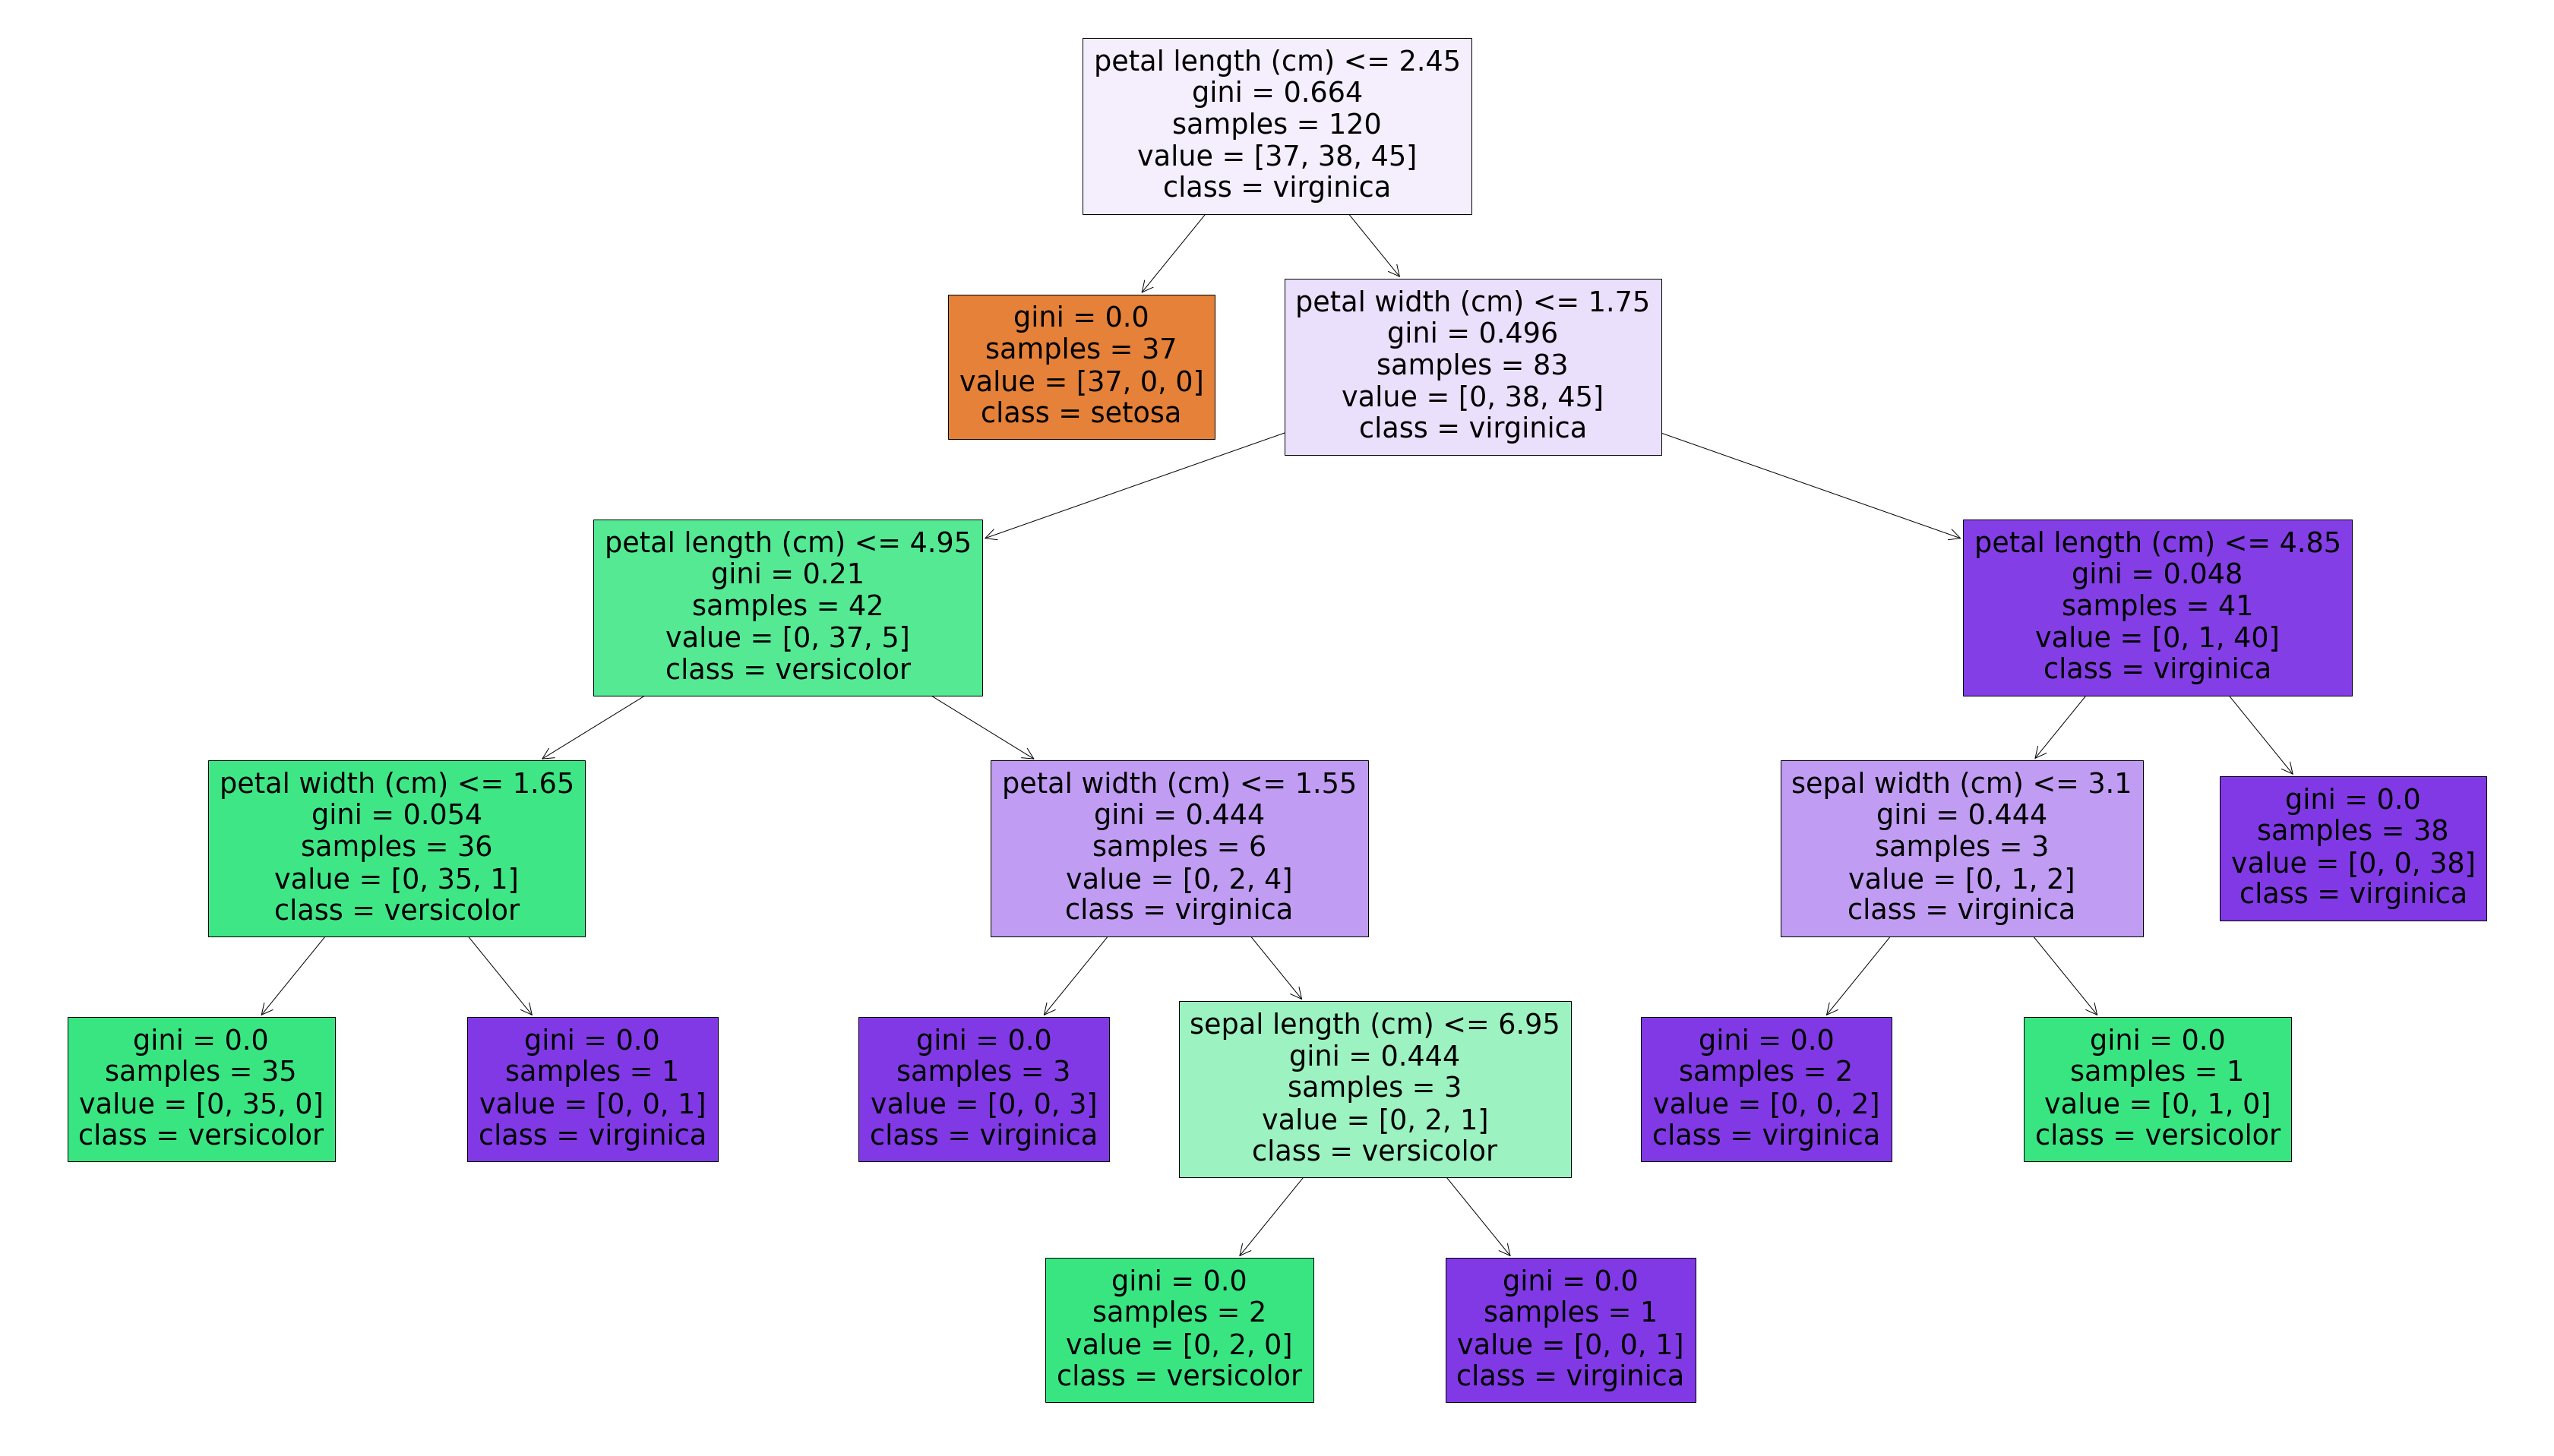

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,35))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True);